In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cPickle

In [12]:
berFile = "simTests/BER.1.SNRTest..SNR3.0.pickle"
total_bit_loss = cPickle.load(file(berFile))

In [13]:
dropped_index = []
plttotal_bit_loss = total_bit_loss
for i in range(len(total_bit_loss)):
    if total_bit_loss[i] == 1.0:
        plttotal_bit_loss[i] = float('NaN')
        dropped_index.append(i)
plttotal_bit_loss = np.array(plttotal_bit_loss)
pltmask = np.isfinite(plttotal_bit_loss)
xseries = np.arange(len(plttotal_bit_loss))

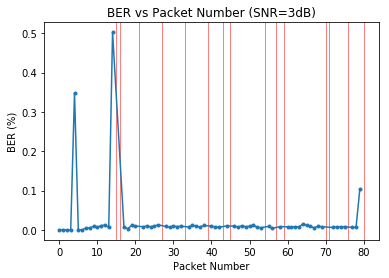

Percentage of packets dropped:  18.5185185185
Average percentage of bits lost per received packet:  0.02185416666666667


In [16]:
for i in range(len(dropped_index)):
    plt.axvline(x=dropped_index[i],color='r',linewidth='0.5')
plt.plot(xseries[pltmask],plttotal_bit_loss[pltmask],'.-')
plt.title("BER vs Packet Number (SNR=3dB)")
plt.xlabel("Packet Number")
plt.ylabel("BER (%)")
plt.show()
print"Percentage of packets dropped: ",((len(dropped_index)/(float(len(total_bit_loss)))*100))
print"Average percentage of bits lost per received packet: ",np.mean(plttotal_bit_loss[pltmask])